In [1]:
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import multiprocessing as mp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] ='/home/maqinlin/miniconda3/envs/lib/R'
import anndata as ad
import seaborn as sns


In [2]:
df = pd.read_csv('/home/maqinlin/mz_project/Data/mouse_embryo/Stereo_seq_data/preprocessing/stereo_input.csv')

df = df[df['Cell_ID'].str.startswith('E16_E1S3_')]
celltype_onehot = pd.get_dummies(df["Cell_Type"])

In [5]:

adata = ad.AnnData(X=celltype_onehot)
adata.obs['x'] = df['x'].values
adata.obs['y'] = df['y'].values
adata.obsm['spatial'] = adata.obs[['x', 'y']].values
adata.var_names = celltype_onehot.columns
adata.obs_names = df['Cell_ID'].astype(str).values 
adata.obs['Cell_ID'] = adata.obs_names
adata.obs['Cell_Type'] = df['Cell_Type'].values

/tmp/ipykernel_74411/2524268726.py:1: FutureWarning: X.dtype being converted to np.float32 from uint8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=celltype_onehot)
/home/maqinlin/miniconda3/envs/PPGCL/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
from ProPaST.ProPaST_niche import ProPaST_niche
model_niche = ProPaST_niche(
    adata = adata,
    device = torch.device("cuda:0"),
    epochs = 400,
    num_clusters = 6
)
adata = model_niche.train()

Building sparse matrix for GNN...


/home/maqinlin/mz_project/ProPaST/ProPaST/preprocess.py:177: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:641.)
  return torch.sparse.FloatTensor(indices, values, shape)


Begin to train Niche data for embedding...


100%|██████████| 400/400 [02:04<00:00,  3.21it/s]


Optimization finished for Niche data!
Cluster-level adjacency matrix shape: (6, 6)


In [7]:
adata.obs['Cell_NTScore']

E16_E1S3_21      0.093401
E16_E1S3_22      0.044448
E16_E1S3_23      0.164424
E16_E1S3_26      0.066418
E16_E1S3_27      0.172625
                   ...   
E16_E1S3_6926    0.600000
E16_E1S3_6928    0.600000
E16_E1S3_6929    0.600000
E16_E1S3_6930    0.600000
E16_E1S3_6931    0.600000
Name: Cell_NTScore, Length: 6625, dtype: float64

[<Axes: title={'center': 'ProPaST_niche_level'}, xlabel='spatial1', ylabel='spatial2'>]

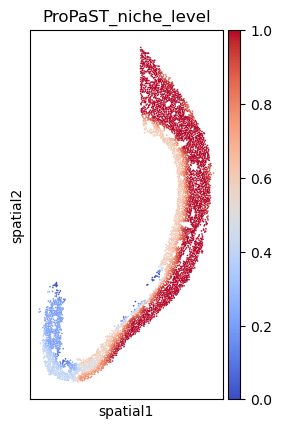

In [33]:
sc.pl.spatial(
    adata,
    img_key=None,
    color=['Cell_NTScore'],
    cmap='coolwarm',
    spot_size=30,
    show=False,
)
